# Analisis de las elecciones estadounidenses 2020

## Librerias

In [34]:
import os
import tweepy as tw
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

print('Terminado')

Terminado


## Autenticación

In [2]:
accesstoken = ""
accesstokensecret = ""
apikey = ""
apisecretkey = ""

In [3]:
auth = tw.OAuthHandler(apikey, apisecretkey)
auth.set_access_token(accesstoken, accesstokensecret)
api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
search_words = "Joe Biden" 
date_since = "2020-10-27"

In [28]:
tweets = tw.Cursor(api.search, q=search_words, lang="en", since=date_since).items(100)
tweets

In [7]:
tweet_details = [[tweet.geo, tweet.text, tweet.user.screen_name, tweet.user.location] for tweet in tweets]

In [8]:
tweet_df = pd.DataFrame(data=tweet_details, columns=["geo","text","user","location"])

In [29]:
pd.set_option('max_colwidth',800)
tweet_df.head()

,geo,text,user,location,Subject,state
0,None,"Happy Birthday to Joe Biden, who shares a birthday today with Robert Kennedy.",crazylegsmike,"Memphis, TN",Joe Biden,Tennessee
1,None,"Joe Biden won this election by at least as wide a margin as Donald Trump did in 2016. I'm joining , …",Joseph100960,"Somewhere around Chicago, IL",Joe Biden,Illinois
2,None,"Maryland Gov. Hogan calls Trump's legal challenges ""ridiculous"" and calls his unwillingness to share info with Biden ""out…",avalontor,"I'm Waldo, find me.",Joe Biden,NaN
3,None,"The lawyers President Trump has been sending to court to challenge the election results have made elementary errors, inclu…",JohnnyKoho,Hinsdale IL,Joe Biden,NaN
4,None,Bipartisan Maricopa County board votes unanimously to certify election results by,HENRY30126252,,Joe Biden,NaN


In [31]:
def limpieza(text):
  text = re.sub("RT @[\w]*:","",text)
  text = re.sub("@[\w]*","",text)
  text = re.sub("https?://[A-Za-z0-9./]*","",text)
  text = re.sub("\n","",text)
  return text

In [33]:
tweet_df['text'] = tweet_df['text'].apply(lambda x: limpieza(x))
tweet_df['Subject'] = search_words
tweet_df.head()

,geo,text,user,location,Subject,state
0,None,"Happy Birthday to Joe Biden, who shares a birthday today with Robert Kennedy.",crazylegsmike,"Memphis, TN",Joe Biden,Tennessee
1,None,"Joe Biden won this election by at least as wide a margin as Donald Trump did in 2016. I'm joining , …",Joseph100960,"Somewhere around Chicago, IL",Joe Biden,Illinois
2,None,"Maryland Gov. Hogan calls Trump's legal challenges ""ridiculous"" and calls his unwillingness to share info with Biden ""out…",avalontor,"I'm Waldo, find me.",Joe Biden,NaN
3,None,"The lawyers President Trump has been sending to court to challenge the election results have made elementary errors, inclu…",JohnnyKoho,Hinsdale IL,Joe Biden,NaN
4,None,Bipartisan Maricopa County board votes unanimously to certify election results by,HENRY30126252,,Joe Biden,NaN


In [12]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii',
          'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
          'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New York', 'New Mexico', 'North Carolina',
          'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
          'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
stateCodes = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
              'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA',
              'WA', 'WV', 'WI', 'WY']
stateMapping = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 
                  'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 
                  'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 
                  'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 
                  'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 
                  'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NY': 'New York', 
                  'NM': 'New Mexico', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 
                  'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 
                  'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT':  'Utah', 'VT': 'Vermont', 
                  'VA': 'Virginia', 'WA': 'Washington', 'WV':  'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}
tweet_copied_df = tweet_df
for index, row in tweet_df.iterrows():
  flag = 0
  if row.location:
    locationSplit = row.location.split(',')
    for word in locationSplit:
      word_stripped = word.strip()
      if word_stripped in states:
        flag = 1
        row['state'] = word_stripped
      elif word_stripped in stateCodes:
        flag = 1
        row['state'] = stateMapping[word_stripped]
  if flag == 0:
    tweet_copied_df = tweet_copied_df.drop(index=index)
  else:
    tweet_copied_df.loc[index, 'state'] = row['state']

In [13]:
tweet_copied_df.to_csv('tweets_election.csv', header=False, mode='a')

# Sentiment Analysis

We use the VADER Sentiment Analyzer in order to perform the sentiment analysis. According to GeeksforGeeks, VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. A sentiment lexicon is a list of lexical features, in simpler terms words which are generally labeled according to their semantic orientation as either positive or negative. VADER not only categorizes a sentiment as positive or negative but also tells us how positive or negative a sentiment is.

In [36]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ricar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [37]:
tweets_election_df = pd.read_csv('tweets_election.csv')
tweets_trump = tweets_election_df[tweets_election_df.Subject == 'Donald Trump']
tweets_trump.drop(tweets_trump.columns[0], axis=1, inplace = True)
tweets_biden = tweets_election_df[tweets_election_df.Subject == 'Joe Biden']
tweets_biden.drop(tweets_biden.columns[0], axis=1, inplace = True)

Text(0.5, 1.0, 'Cantidad de Tweets por cada candidato por estado')

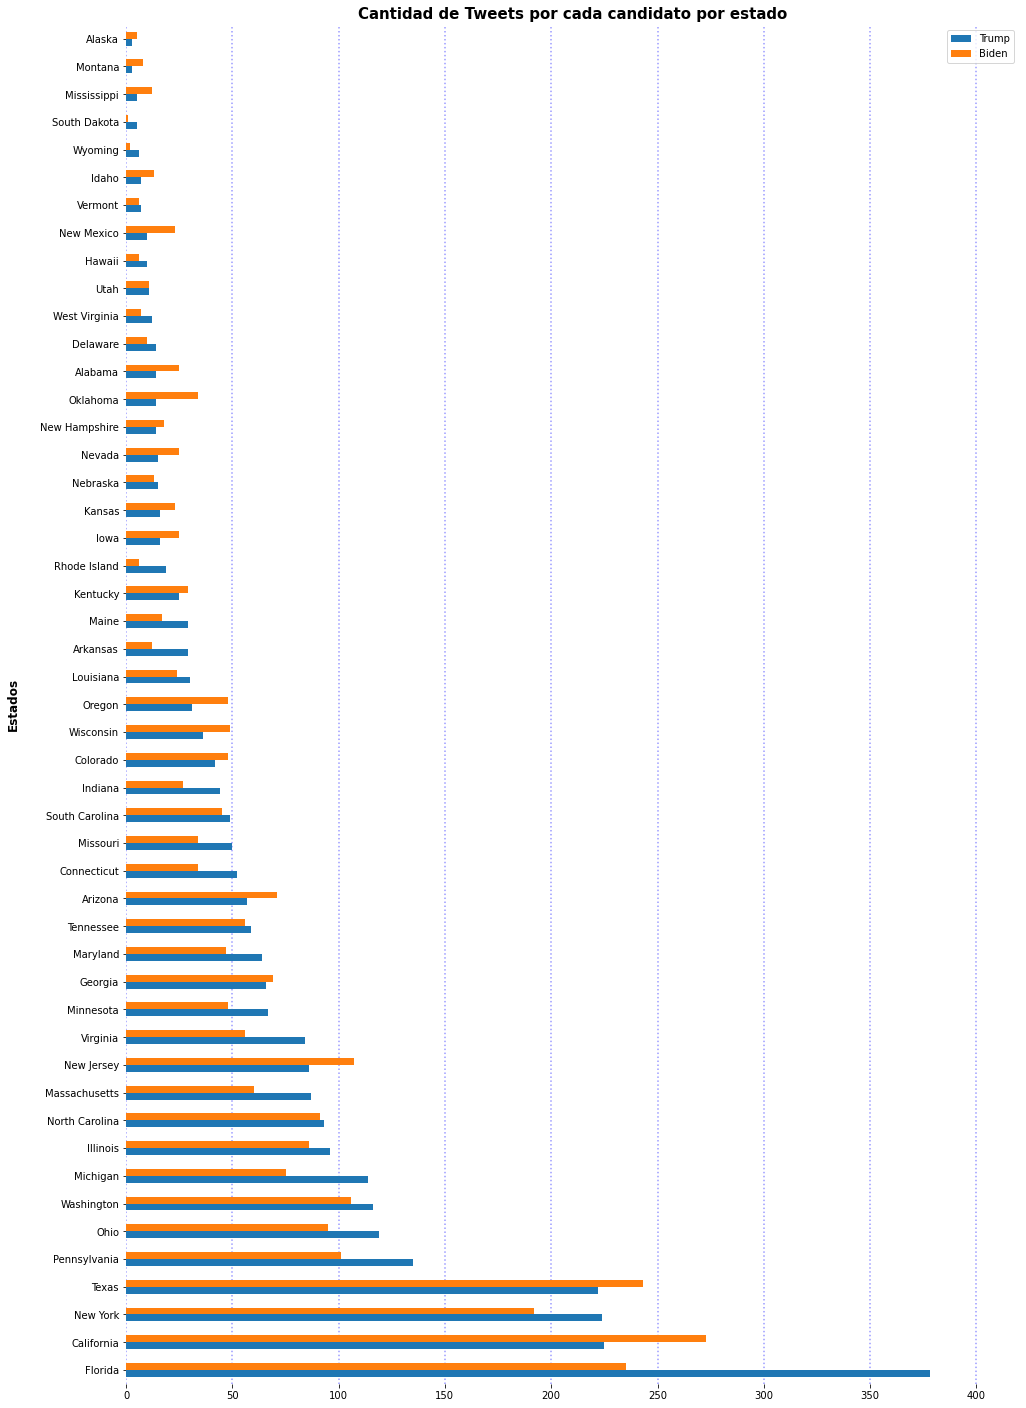

In [42]:
df = pd.merge(tweets_trump.state.value_counts(), tweets_biden.state.value_counts(), right_index = True, 
               left_index = True)
df = df.rename(columns = {"state_x": "Trump", "state_y": "Biden"})
ax = df.plot(kind='barh', figsize=(16, 25), zorder=2)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

vals = ax.get_xticks()
for tick in vals:
      ax.axvline(x=tick, linestyle='dotted', alpha=0.4, color='blue', zorder=1)

ax.set_ylabel("Estados", labelpad=20, weight='bold', size=12)
ax.set_title('Cantidad de Tweets por cada candidato por estado',fontweight="bold", size=15)

In [43]:
tweets_trump['sentiment'] = tweets_trump['text'].apply(lambda x: sid.polarity_scores(x))
tweets_biden['sentiment'] = tweets_biden['text'].apply(lambda x: sid.polarity_scores(x))

In [49]:
def analisisSentimental(sentiment):
  if sentiment['compound'] >= 0.05:
    return "Positive"
  elif sentiment['compound'] <= -0.05:
    return "Negative"
  else:
    return "Neutral"

tweets_trump['sentiment_overall'] = tweets_trump['sentiment'].apply(lambda x: analisisSentimental(x))
tweets_biden['sentiment_overall'] = tweets_biden['sentiment'].apply(lambda x: analisisSentimental(x))

In [58]:
tweets_location_df = pd.DataFrame({'State': [state for state in states],
                                         'Trump Positive': [0 for state in states],
                                         'Trump Negative': [0 for state in states],
                                         'Trump Neutral': [0 for state in states],
                                         'Trump Total': [0 for state in states],
                                         'Biden Positive': [0 for state in states],
                                         'Biden Negative': [0 for state in states],
                                         'Biden Neutral': [0 for state in states],
                                         'Biden Total': [0 for state in states]})
tweets_location_df.set_index('State', inplace = True)
for state in states:
  positiveTrump, negativeTrump, neutralTrump, positiveBiden, negativeBiden, neutralBiden = 0, 0, 0, 0, 0, 0
  try:
    positiveTrump = tweets_trump_location[state]['Positive']
  except:
    positiveTrump = 0
  
  try:
    negativeTrump = tweets_trump_location[state]['Negative']
  except:
    negativeTrump = 0
  
  try:
    neutralTrump = tweets_trump_location[state]['Neutral']
  except:
    neutralTrump = 0
  
  try:
    positiveBiden = tweets_biden_location[state]['Positive']
  except:
    positiveBiden = 0
  
  try:
    negativeBiden = tweets_biden_location[state]['Negative']
  except:
    negativeBiden = 0
  
  try:
    neutralBiden = tweets_biden_location[state]['Neutral']
  except:
    neutralBiden = 0

  totalTrump = positiveTrump + negativeTrump + neutralTrump
  totalBiden = positiveBiden + negativeBiden + neutralBiden

  if totalTrump == 0:
    tweets_location_df.at[state, 'Trump Positive'], tweets_location_df.at[state, 'Trump Negative'], tweets_location_df.at[state, 'Trump Neutral'] = 0,0,0
  else:
    tweets_location_df.at[state, 'Trump Positive'] = round((positiveTrump/totalTrump)*100.0)
    tweets_location_df.at[state, 'Trump Negative'] = round((negativeTrump/totalTrump)*100.0)
    tweets_location_df.at[state, 'Trump Neutral'] = round((neutralTrump/totalTrump)*100.0)
  tweets_location_df.at[state, 'Trump Total'] = totalTrump
  
  if totalBiden == 0:
    tweets_location_df.at[state, 'Biden Positive'], tweets_location_df.at[state, 'Biden Negative'], tweets_location_df.at[state, 'Biden Neutral'] = 0,0,0
  else:
    tweets_location_df.at[state, 'Biden Positive'] = round((positiveBiden/totalBiden)*100.0)
    tweets_location_df.at[state, 'Biden Negative'] = round((negativeBiden/totalBiden)*100.0)
    tweets_location_df.at[state, 'Biden Neutral'] = round((neutralBiden/totalBiden)*100.0)
  tweets_location_df.at[state, 'Biden Total'] = totalBiden
tweets_location_df

,Trump Positive,Trump Negative,Trump Neutral,Trump Total,Biden Positive,Biden Negative,Biden Neutral,Biden Total
State,,,,,,,,
Alabama,50,29,21,14,24,40,36,25
Alaska,67,0,33,3,40,40,20,5
Arizona,35,30,35,57,39,34,27,71
Arkansas,38,21,41,29,42,25,33,12
California,39,39,23,225,32,42,25,273
Colorado,45,33,21,42,38,35,27,48
Connecticut,31,37,33,52,29,38,32,34
Delaware,29,29,43,14,30,40,30,10
Florida,37,34,29,378,31,31,37,235


In [59]:
tweets_location_df['Orientacion'] = 'Neutral'
for index, row in tweets_location_df.iterrows():
  if row['Trump Total'] <= 15 and row['Biden Total'] <= 15:
    tweets_location_df.loc[index, 'Predicted Judgement'] = 'No se puede determinar'
  else:
    if row['Trump Positive'] > row['Biden Positive'] and (row['Trump Negative'] < row['Biden Negative'] or row['Trump Neutral'] > row['Biden Neutral']):
      tweets_location_df.loc[index, 'Orientacion'] = 'Fuertemente Republicano'
    elif row['Biden Positive'] > row['Trump Positive'] and (row['Biden Negative'] < row['Trump Negative'] or row['Biden Neutral'] > row['Trump Neutral']):
      tweets_location_df.loc[index, 'Orientacion'] = 'Fuertemente Democrata'
    elif row['Trump Positive'] - row['Biden Positive'] > row['Biden Negative'] - row['Trump Negative']:
      tweets_location_df.loc[index, 'Orientacion'] = 'Vagamente republicano'
    elif row['Biden Positive'] - row['Trump Positive'] > row['Trump Negative'] - row['Biden Negative']:
      tweets_location_df.loc[index, 'Orientacion'] = 'Vagamente democrata'
tweets_location_df = tweets_location_df.rename(columns={'Trump Positive': 'Trump Positivo (%)', 
                                                        'Trump Negative': 'Trump Negativo (%)',
                                                        'Trump Neutral': 'Trump Neutral (%)',
                                                        'Trump Total': 'Total de menciones para Trump',
                                                        'Biden Positive': 'Biden Positivo (%)',
                                                        'Biden Negative': 'Biden Negativo (%)',
                                                        'Biden Neutral': 'Biden Neutral (%)',
                                                        'Biden Total': 'Total de menciones para Biden'})
tweets_location_df

,Trump Positivo (%),Trump Negativo (%),Trump Neutral (%),Total de menciones para Trump,Biden Positivo (%),Biden Negativo (%),Biden Neutral (%),Total de menciones para Biden,Orientacion,Predicted Judgement
State,,,,,,,,,,
Alabama,50,29,21,14,24,40,36,25,Fuertemente Republicano,NaN
Alaska,67,0,33,3,40,40,20,5,Neutral,No se puede determinar
Arizona,35,30,35,57,39,34,27,71,Vagamente democrata,NaN
Arkansas,38,21,41,29,42,25,33,12,Vagamente democrata,NaN
California,39,39,23,225,32,42,25,273,Fuertemente Republicano,NaN
Colorado,45,33,21,42,38,35,27,48,Fuertemente Republicano,NaN
Connecticut,31,37,33,52,29,38,32,34,Fuertemente Republicano,NaN
Delaware,29,29,43,14,30,40,30,10,Neutral,No se puede determinar
Florida,37,34,29,378,31,31,37,235,Vagamente republicano,NaN


In [60]:
tweets_location_df.groupby('Orientacion').size()

Orientacion
Fuertemente Democrata       6
Fuertemente Republicano    14
Neutral                    13
Vagamente democrata        10
Vagamente republicano       7
dtype: int64